In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ndimkD0XjsOutD4hgC4O")
project = rf.workspace("1thesis").project("leafy-vegetables-classification2")
dataset = project.version(2).download("folder")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 5.1 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=e81f0c7ef8d6d6ebe841f66dce3df2730850552866669b1ce6e171f8a558bc67
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Succes

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to leafy-vegetables-classification2-2 in folder:: 100%|██████████| 3332/3332 [00:01<00:00, 1844.52it/s]


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls '/content/drive'


MyDrive


In [ ]:
#Give dataset path
train_path = '/content/leafy-vegetables-classification2-2/train'
test_path = '/content/leafy-vegetables-classification2-2/test'

Working with 323 images
Image examples: 
bottle-gourd-130-_jpg.rf.68581b11e83c0bbacef0dd0d674c23fc.jpg


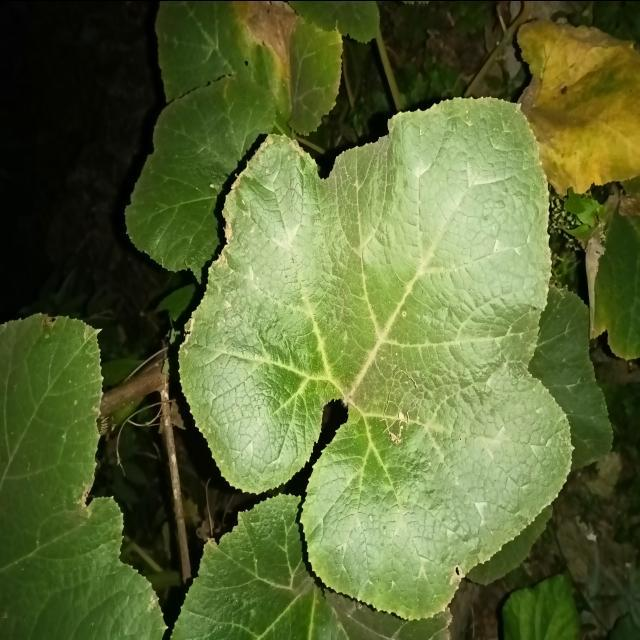

1-136-_jpg.rf.55983df2e77ec39f181c520b8a37fcd9.jpg


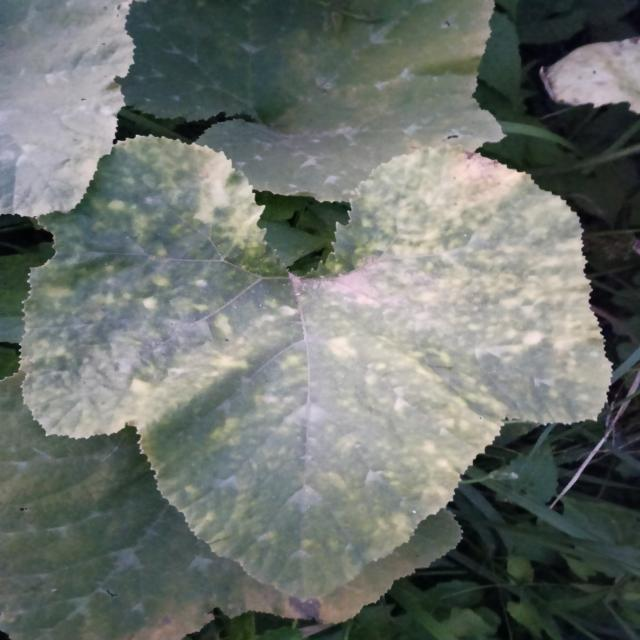

1-111-_jpg.rf.0ccc2f456e8e1c942da59a7d98289e4d.jpg


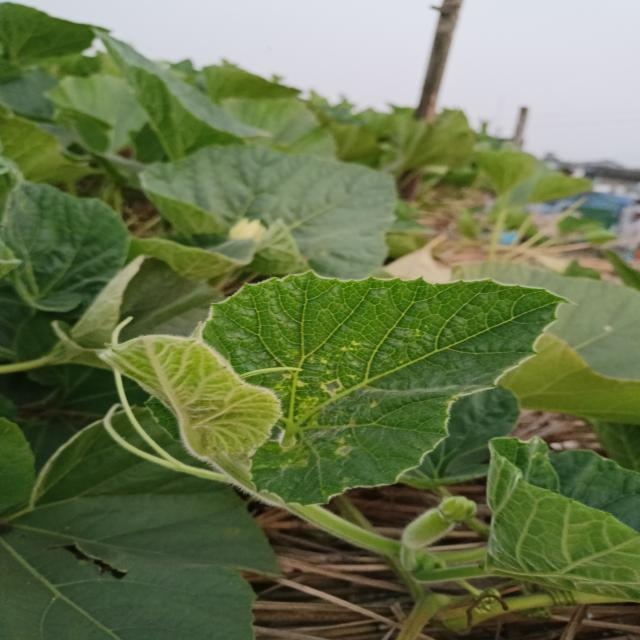

bottle-gourd-163-_jpg.rf.974b1fa25c1b8f49258571500028eb9b.jpg


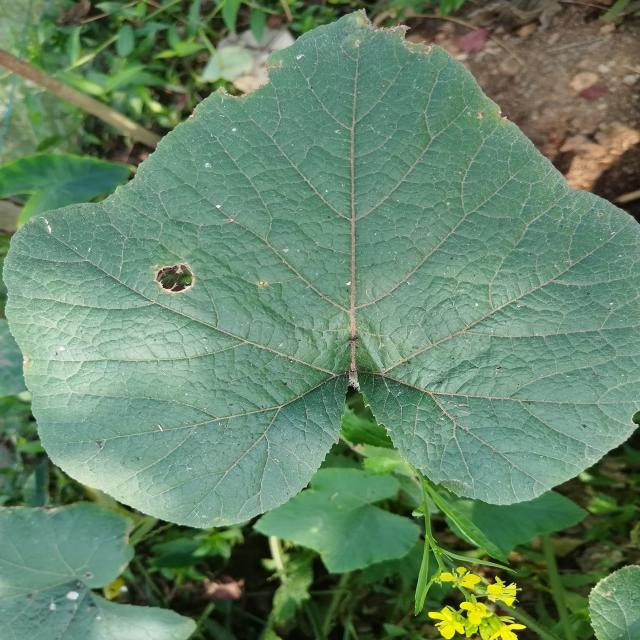

bottle-gourd-257-_jpg.rf.8702f71cef88b05184f8fa6a0561d4e0.jpg


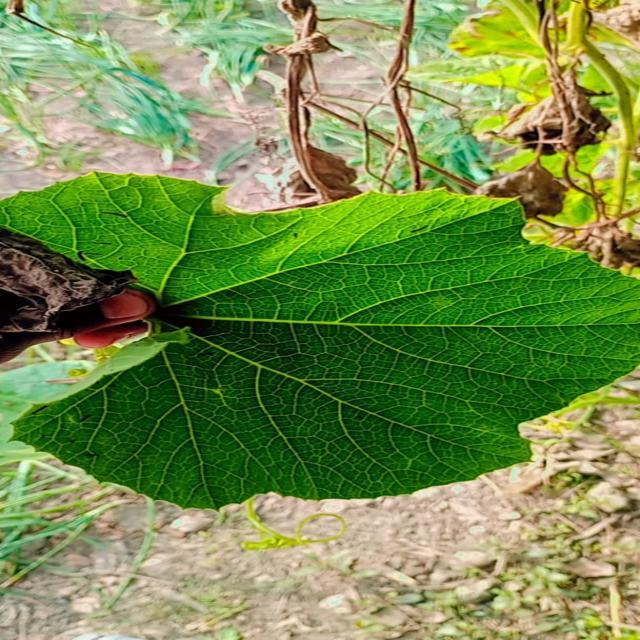

1-99-_jpg.rf.1902ac16c4c7afb8e4e11524551b0908.jpg


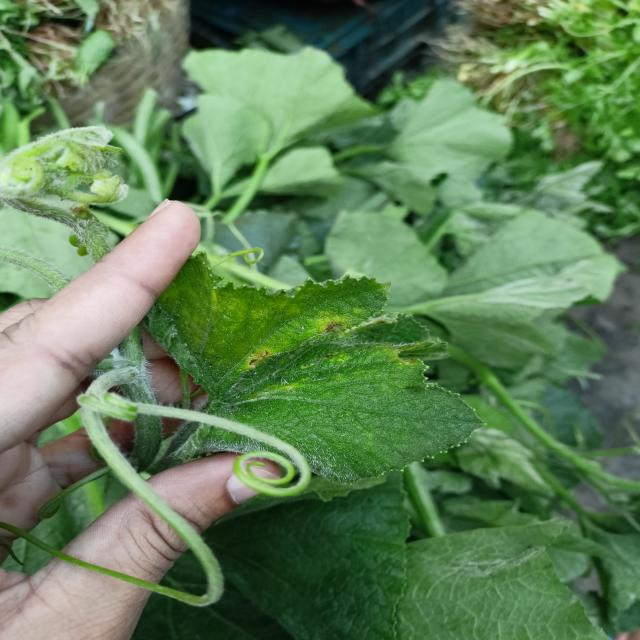

1-110-_jpg.rf.66998f2ecfbf7e251181ed288118a972.jpg


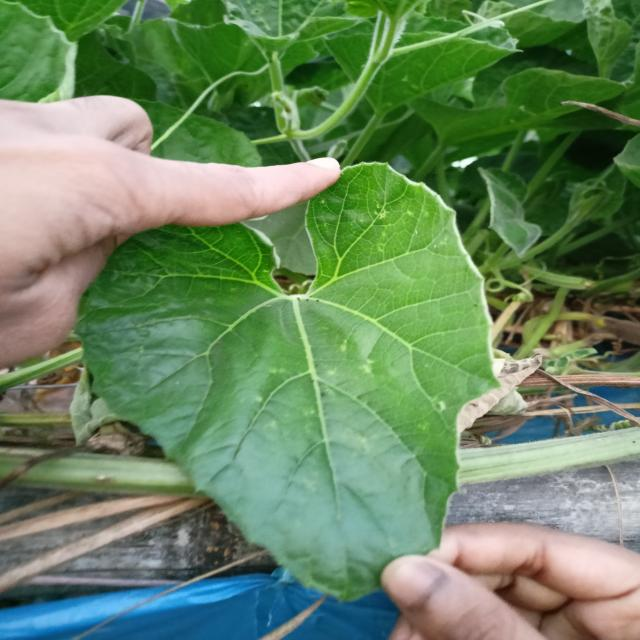

1-11-_jpg.rf.e42c8af1f781fc1823b0eb016c6601c9.jpg


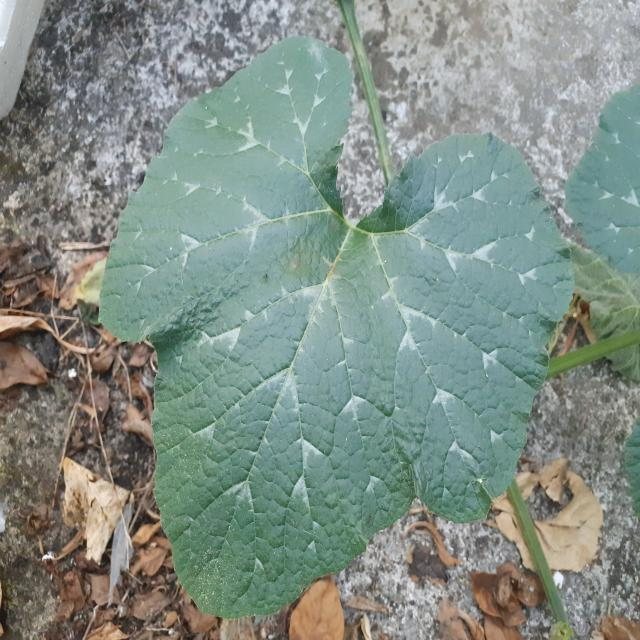

bottle-gourd-89-_jpg.rf.0bb3c29f98a5b7a8d8b7526fb9314678.jpg


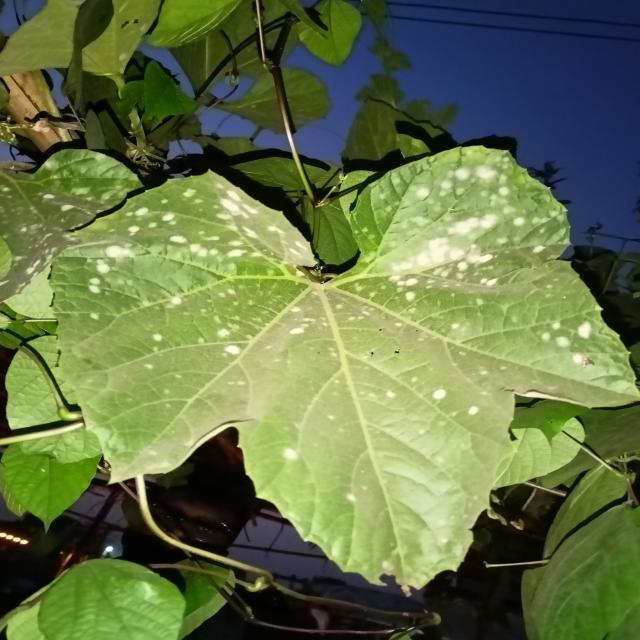

bottle-gourd-33-_jpg.rf.de0590bc8f9dae9ae3ad108047101d67.jpg


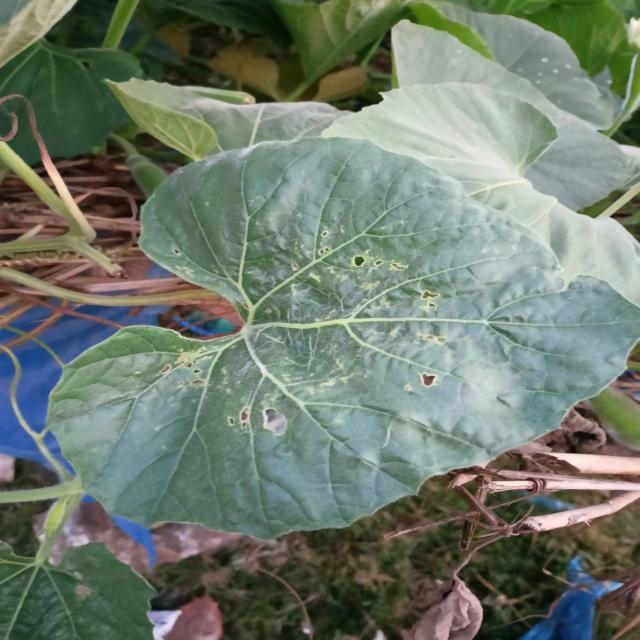

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object


folder = train_path+'/bottle-gourd'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/leafy-vegetables-classification2-2/train/*')
print(len(folders))

7


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 2473 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 298 images belonging to 7 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10



Epoch 1: val_loss improved from inf to 0.71991, saving model to mymodel.h5
5/5 - 605s - loss: 1.3337 - accuracy: 0.7453 - val_loss: 0.7199 - val_accuracy: 0.8993 - 605s/epoch - 121s/step
Epoch 2/10


5/5 - 399s - loss: 0.6707 - accuracy: 0.8562 - 399s/epoch - 80s/step
Epoch 3/10


5/5 - 404s - loss: 0.4813 - accuracy: 0.8813 - 404s/epoch - 81s/step
Epoch 4/10


5/5 - 409s - loss: 0.2655 - accuracy: 0.9328 - 409s/epoch - 82s/step
Epoch 5/10


5/5 - 397s - loss: 0.1820 - accuracy: 0.9469 - 397s/epoch - 79s/step
Epoch 6/10


5/5 - 353s - loss: 0.1538 - accuracy: 0.9620 - 353s/epoch - 71s/step
Epoch 7/10


5/5 - 342s - loss: 0.1183 - accuracy: 0.9602 - 342s/epoch - 68s/step
Epoch 8/10


5/5 - 402s - loss: 0.1077 - accuracy: 0.9656 - 402s/epoch - 80s/step
Epoch 9/10


5/5 - 417s - loss: 0.0875 - accuracy: 0.9641 - 417s/epoch - 83s/step
Epoch 10/10


5/5 - 393s - loss: 0.0631 - accuracy: 0.9750 - 393s/epoch - 79s/step
Training completed in time:  1:11:01.901182


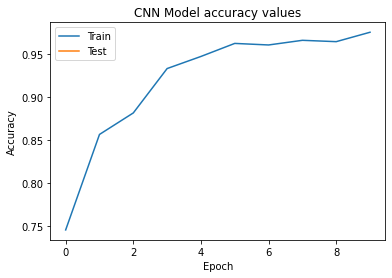

In [ ]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("vgg16_acc.pdf", format="pdf", bbox_inches="tight")
plt.show()
